In [2]:
# importamos las librerías que necesitamos

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluar linealidad de las relaciones entre las variables
# ------------------------------------------------------------------------------
from scipy.stats import shapiro, kstest

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Gestión de los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")



In [3]:
# lo primero que hacemos es cargar el dataframe que vamos a usar para esta lección
df = pd.read_csv("world_data_total_2.csv", index_col = 0)
df.head()

,density(p/km2),abbreviation,agricultural_land,land_area,armed_forces_size,birth_rate,calling_code,capital/major_city,co2-emissions,cpi,cpi_change,currency-code,fertility_rate,forested_area,gasoline_price,unnamed_0_y,gdp,gross_primary_education_enrollment,gross_tertiary_education_enrollment,infant_mortality,largest_city,life_expectancy,maternal_mortality_ratio,minimum_wage,official_language,out_of_pocket_health_expenditure,physicians_per_thousand,population,population_labor_force_participation,tax_revenue,total_tax_rate,unemployment_rate,urban_population,country,latitud,longitud,continent
unnamed_0_x,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,60.0,AF,58.1,652230.0,323000.0,32.49,93.0,Kabul,8672.0,149.90,2.3,AFN,4.47,2.1,0.70,0,1.910135e+10,104.0,9.7,47.9,Kabul,64.5,638.0,0.43,Pashto,78.4,0.28,38041754.0,48.9,9.3,71.4,11.12,9797273.0,Afghanistan,3393911.0,67709953.0,Asia
1,105.0,AL,43.1,28748.0,9000.0,11.78,355.0,Tirana,4536.0,119.05,1.4,ALL,1.62,28.1,1.36,1,1.527808e+10,107.0,55.0,7.8,Tirana,78.5,15.0,1.12,Albanian,56.9,1.20,2854191.0,55.7,18.6,36.6,12.33,1747593.0,Albania,41153332.0,20168331.0,Europe
2,18.0,DZ,17.4,2381741.0,317000.0,24.28,213.0,Algiers,150006.0,151.36,2.0,DZD,3.02,0.8,0.28,2,1.699882e+11,109.9,51.4,20.1,Algiers,76.7,112.0,0.95,Arabic,28.1,1.72,43053054.0,41.2,37.2,66.1,11.70,31510100.0,Algeria,28033886.0,1659626.0,Africa
3,164.0,AD,40.0,468.0,NaN,7.20,376.0,Andorra la Vella,469.0,NaN,NaN,EUR,1.27,34.0,1.51,3,3.154058e+09,106.4,NaN,2.7,Andorra la Vella,NaN,NaN,6.63,Catalan,36.4,3.33,77142.0,NaN,NaN,NaN,NaN,67873.0,Andorra,42506285.0,1521801.0,Europe
4,26.0,AO,47.5,1246700.0,117000.0,40.73,244.0,Luanda,34693.0,261.73,17.1,AOA,5.52,46.3,0.97,4,9.463542e+10,113.5,9.3,51.6,Luanda,60.8,241.0,0.71,Portuguese,33.4,0.21,31825295.0,77.5,9.2,49.1,6.89,21061025.0,Angola,-11202692.0,17873887.0,Africa



1. Calcula las siguientes estadísticas descriptivas para las variables numéricas: Media, Mediana, Desviación estándar, Mínimo, Máximo


In [4]:

df.describe()

,density(p/km2),agricultural_land,land_area,armed_forces_size,birth_rate,calling_code,co2-emissions,cpi,cpi_change,fertility_rate,forested_area,gasoline_price,unnamed_0_y,gdp,gross_primary_education_enrollment,gross_tertiary_education_enrollment,infant_mortality,life_expectancy,maternal_mortality_ratio,minimum_wage,out_of_pocket_health_expenditure,physicians_per_thousand,population,population_labor_force_participation,tax_revenue,total_tax_rate,unemployment_rate,urban_population,latitud,longitud
count,195.000000,188.000000,1.940000e+02,1.710000e+02,189.000000,194.000000,1.880000e+02,178.000000,179.000000,188.000000,188.000000,175.000000,195.000000,1.930000e+02,188.000000,183.000000,189.000000,187.000000,181.000000,150.000000,188.000000,188.000000,1.940000e+02,176.000000,169.000000,183.000000,176.000000,1.900000e+02,1.940000e+02,1.940000e+02
mean,356.764103,39.117553,6.896244e+05,1.592749e+05,20.214974,360.546392,1.777992e+05,190.460955,6.722346,2.698138,32.015426,1.002457,97.000000,4.772959e+11,102.470213,37.963388,21.332804,72.279679,160.392265,2.194133,32.637234,1.839840,3.938116e+07,62.738068,16.573964,40.822404,6.886364,2.230454e+07,2.151013e+07,1.329054e+07
std,1982.888967,21.783052,1.921609e+06,3.806288e+05,9.945774,323.236419,8.387903e+05,397.947380,24.450414,1.282267,23.791331,0.368858,56.435804,2.172173e+12,13.151607,29.261022,19.548058,7.483661,233.502024,2.970796,19.172697,1.684261,1.450924e+08,10.502907,6.961632,20.557662,5.079216,7.543050e+07,5.201068e+07,1.314180e+08
min,2.000000,0.600000,0.000000e+00,0.000000e+00,5.900000,1.000000,1.100000e+01,99.030000,-4.300000,0.980000,0.000000,0.000000,0.000000,4.727146e+07,23.400000,0.800000,1.400000,52.800000,2.000000,0.010000,0.200000,0.010000,8.360000e+02,38.000000,0.000000,8.000000,0.090000,5.464000e+03,-4.090056e+07,-1.573768e+09
25%,35.500000,21.700000,2.382825e+04,1.100000e+04,11.300000,82.500000,2.304250e+03,113.885000,1.000000,1.705000,11.000000,0.755000,48.500000,8.454620e+09,98.950000,12.150000,6.000000,67.000000,13.000000,0.402500,17.450000,0.332500,1.962678e+06,56.150000,11.700000,30.600000,3.395000,1.152961e+06,7.963158e+05,-1.426993e+06
50%,89.000000,39.600000,1.195110e+05,3.100000e+04,17.950000,255.500000,1.230300e+04,125.340000,2.300000,2.245000,32.000000,0.980000,97.000000,3.438723e+10,102.550000,31.200000,14.000000,73.200000,53.000000,1.045000,30.700000,1.460000,8.826588e+06,62.450000,16.300000,37.200000,5.360000,4.678104e+06,1.308910e+07,1.772200e+07
75%,216.500000,55.375000,5.242560e+05,1.420000e+05,28.750000,506.750000,6.388425e+04,157.265000,4.250000,3.597500,48.175000,1.240000,145.500000,2.340940e+11,108.025000,63.150000,32.700000,77.500000,186.000000,2.447500,43.975000,2.935000,2.858549e+07,69.500000,21.100000,48.000000,9.490000,1.490324e+07,3.819698e+07,4.591950e+07
max,26337.000000,82.600000,1.709824e+07,3.031000e+06,46.080000,1876.000000,9.893038e+06,4583.710000,254.900000,6.910000,98.300000,2.000000,194.000000,2.142770e+13,142.500000,136.600000,84.500000,85.400000,1150.000000,13.590000,81.600000,8.420000,1.397715e+09,86.800000,37.200000,219.600000,28.180000,8.429340e+08,4.714104e+08,3.130698e+08


2. Identifica el país con la mayor densidad de población y el país con la menor población en el conjunto de datos.

In [13]:
df.loc[df['density(p/km2)'].idxmax(), "country"]


'Monaco'

In [14]:
df.loc[df['density(p/km2)'].idxmin(), "country"]

'Mongolia'

3. Calcula la tasa promedio de natalidad (birth_rate) para todos los países en el conjunto de datos.

In [16]:
media_natalidad = df['birth_rate'].mean()
media_natalidad


20.21497354497354

4. Realiza un análisis de la mortalidad infantil (infant_mortality) y clasifica los países en tres categorías: baja, moderada y alta mortalidad infantil.

In [ ]:
df

In [30]:
def categoria_mortalidad(valor):
    if valor < np.nanpercentile(df["infant_mortality"],33):
        return "baja"
    elif np.nanpercentile(df["infant_mortality"],33)<=valor <= np.nanpercentile(df["infant_mortality"],66):
        return "moderada"
    elif valor > np.nanpercentile(df["infant_mortality"],66):
        return "alta"


In [31]:
df["infant_mortality_1"] = df["infant_mortality"].apply(categoria_mortalidad)

In [32]:
df["infant_mortality_1"].value_counts()

alta        64
baja        63
moderada    62
Name: infant_mortality_1, dtype: int64

5. Calcula la correlación entre las variables de "fertility_rate" y "life_expectancy". Interpreta la relación entre estas dos variables. ¿Qué tipo de correlación hay? Explica la razón de esta relación, existe una correlación negativa fuerte lo que significa que cuando una variable sube la otra baja.

In [33]:
# Calcular la correlación de Spearman
df_correlaciones = df["fertility_rate"].corr(df["life_expectancy"], method='spearman')
df_correlaciones

-0.8430472266451204

6. Visualiza la distribución de la variable "cpi" utilizando un histograma y comenta sobre la distribución de los índices de percepción de corrupción. el cpi de la mayoria de paises es muy baja.

In [36]:
df["cpi"].value_counts()

110.62    2
99.55     2
106.58    2
149.90    1
114.24    1
         ..
112.85    1
268.36    1
101.87    1
107.43    1
105.51    1
Name: cpi, Length: 175, dtype: int64

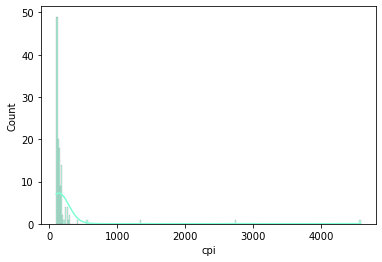

In [35]:

sns.histplot(data=df, 
             x='cpi', 
             kde=True, 
             color='aquamarine');

7. Encuentra el país con la mayor diferencia entre el "gdp" (Producto Interno Bruto) y el "co2-emissions" (emisiones de dióxido de carbono).

In [38]:
df["dif_gdp_co2"] = df["gdp"] - df["co2-emissions"]

In [40]:
df.loc[df['dif_gdp_co2'].idxmax(), "country"]

'United States'

8. Calcula el porcentaje promedio de personas que participan en la fuerza laboral(population_labor_force_participation) para todos los países.

In [41]:
df["population_labor_force_participation"].mean()

62.73806818181817

9. Genera un mapa de calor (heatmap) de la matriz de correlación de todas las variables numéricas y discute las relaciones más destacadas.

In [43]:
from itertools import combinations
# definimos la lista los nombres de las variables numéricas 
numericas = df.select_dtypes(include = np.number).columns

# usando el metodo 'combinations' vamos a generar todas las combinaciones posibles de columnas
combinaciones = list(combinations(numericas, 2))

# printeamos los resultados, una lista de tuplas
combinaciones

[('density(p/km2)', 'agricultural_land'),
 ('density(p/km2)', 'land_area'),
 ('density(p/km2)', 'armed_forces_size'),
 ('density(p/km2)', 'birth_rate'),
 ('density(p/km2)', 'calling_code'),
 ('density(p/km2)', 'co2-emissions'),
 ('density(p/km2)', 'cpi'),
 ('density(p/km2)', 'cpi_change'),
 ('density(p/km2)', 'fertility_rate'),
 ('density(p/km2)', 'forested_area'),
 ('density(p/km2)', 'gasoline_price'),
 ('density(p/km2)', 'unnamed_0_y'),
 ('density(p/km2)', 'gdp'),
 ('density(p/km2)', 'gross_primary_education_enrollment'),
 ('density(p/km2)', 'gross_tertiary_education_enrollment'),
 ('density(p/km2)', 'infant_mortality'),
 ('density(p/km2)', 'life_expectancy'),
 ('density(p/km2)', 'maternal_mortality_ratio'),
 ('density(p/km2)', 'minimum_wage'),
 ('density(p/km2)', 'out_of_pocket_health_expenditure'),
 ('density(p/km2)', 'physicians_per_thousand'),
 ('density(p/km2)', 'population'),
 ('density(p/km2)', 'population_labor_force_participation'),
 ('density(p/km2)', 'tax_revenue'),
 ('den

In [44]:
# creamos una función para identificar si las relaciones entre las variables son lienales o no
def identificar_linealidad (dataframe, lista_combinacion_columnas):
    """
    Identifica si las relaciones entre pares de variables en un DataFrame son lineales o no.

    Parameters:
    -----------
    dataframe : pandas.DataFrame
        El DataFrame que contiene las variables a analizar.

    lista_combinacion_columnas : list of tuples
        Una lista de tuplas donde cada tupla contiene dos nombres de columnas del DataFrame que se desea analizar.

    Returns:
    --------
    relaciones_lineales : list of tuples
        Una lista de tuplas que contienen los nombres de las columnas que tienen una relación lineal.

    relaciones_no_lineales : list of tuples
        Una lista de tuplas que contienen los nombres de las columnas que no tienen una relación lineal.

    """
    relaciones_lineales = []
    relaciones_no_lineales = []

    for tupla in lista_combinacion_columnas: 
        # Realizar la prueba de normalidad
        _, p_value1 = kstest(dataframe[tupla[0]], "norm")
        _, p_value2 = kstest(dataframe[tupla[1]], "norm")

        if p_value1 > 0.05 and p_value2 > 0.05:
            relaciones_lineales.append(tupla)
        else:
            relaciones_no_lineales.append(tupla)

    return relaciones_lineales, relaciones_no_lineales

# llamamos a la funcion

lineal, no_lineal = identificar_linealidad(df, combinaciones)

print(f"Las variables a las que tengamos que aplicar la correlacion de pearson son: {lineal}")
print(f"Las variables a las que tengamos que aplicar la correlacion de spearman son: {no_lineal}")

Las variables a las que tengamos que aplicar la correlacion de pearson son: []
Las variables a las que tengamos que aplicar la correlacion de spearman son: [('density(p/km2)', 'agricultural_land'), ('density(p/km2)', 'land_area'), ('density(p/km2)', 'armed_forces_size'), ('density(p/km2)', 'birth_rate'), ('density(p/km2)', 'calling_code'), ('density(p/km2)', 'co2-emissions'), ('density(p/km2)', 'cpi'), ('density(p/km2)', 'cpi_change'), ('density(p/km2)', 'fertility_rate'), ('density(p/km2)', 'forested_area'), ('density(p/km2)', 'gasoline_price'), ('density(p/km2)', 'unnamed_0_y'), ('density(p/km2)', 'gdp'), ('density(p/km2)', 'gross_primary_education_enrollment'), ('density(p/km2)', 'gross_tertiary_education_enrollment'), ('density(p/km2)', 'infant_mortality'), ('density(p/km2)', 'life_expectancy'), ('density(p/km2)', 'maternal_mortality_ratio'), ('density(p/km2)', 'minimum_wage'), ('density(p/km2)', 'out_of_pocket_health_expenditure'), ('density(p/km2)', 'physicians_per_thousand'), ('

In [46]:
df_numeric = df.select_dtypes(include='number')

# Calcular la correlación de Spearman
df_correlaciones = df_numeric.corr(method='spearman')
df_correlaciones

,density(p/km2),agricultural_land,land_area,armed_forces_size,birth_rate,calling_code,co2-emissions,cpi,cpi_change,fertility_rate,forested_area,gasoline_price,unnamed_0_y,gdp,gross_primary_education_enrollment,gross_tertiary_education_enrollment,infant_mortality,life_expectancy,maternal_mortality_ratio,minimum_wage,out_of_pocket_health_expenditure,physicians_per_thousand,population,population_labor_force_participation,tax_revenue,total_tax_rate,unemployment_rate,urban_population,latitud,longitud,dif_gdp_co2
density(p/km2),1.000000,0.154141,-0.579424,0.105384,-0.265946,-0.027181,-0.009172,-0.194308,-0.177130,-0.258681,-0.115314,0.178146,0.056762,-0.006516,0.028644,0.027404,-0.172333,0.220662,-0.144929,0.106410,0.011497,0.084090,-0.085660,-0.061486,0.064040,-0.048854,-0.215339,-0.057839,0.168232,0.049464,0.030154
agricultural_land,0.154141,1.000000,0.146986,0.163935,0.173660,-0.036252,0.074012,0.232081,0.232981,0.164436,-0.382159,0.031457,0.059480,0.078430,-0.060903,-0.132087,0.200319,-0.221712,0.146761,-0.191189,0.111157,-0.080401,0.276620,-0.150819,-0.072350,0.159252,0.055847,0.233397,0.050624,-0.015474,0.070456
land_area,-0.579424,0.146986,1.000000,0.575037,0.267674,-0.284213,0.584187,0.401461,0.333871,0.249815,-0.141641,-0.335302,0.028242,0.583055,0.000739,0.013473,0.216256,-0.198041,0.196945,-0.196361,0.220761,-0.122541,0.813623,-0.014817,-0.423104,0.245582,0.045625,0.776581,-0.081474,0.080511,0.558848
armed_forces_size,0.105384,0.163935,0.575037,1.000000,-0.141813,-0.261176,0.735598,0.138153,0.119756,-0.122133,-0.133058,-0.226327,0.126279,0.707670,0.019564,0.273895,-0.114122,0.157792,-0.130084,0.086141,0.250734,0.141343,0.818154,-0.106209,-0.268181,0.187224,-0.089815,0.828893,0.159672,0.264821,0.707670
birth_rate,-0.265946,0.173660,0.267674,-0.141813,1.000000,0.164103,-0.422148,0.400977,0.237546,0.980987,-0.084387,-0.302687,0.020773,-0.416506,0.064180,-0.787452,0.895507,-0.859974,0.856945,-0.657015,0.245818,-0.845314,0.137613,0.213206,-0.397999,0.168458,-0.055770,-0.010068,-0.460570,0.041270,-0.450524
calling_code,-0.027181,-0.036252,-0.284213,-0.261176,0.164103,1.000000,-0.277268,0.087829,-0.016856,0.164907,-0.085191,-0.143463,0.064886,-0.356442,-0.068676,-0.227563,0.106171,-0.154025,0.051555,-0.151760,-0.054249,-0.074278,-0.343347,0.084262,0.005102,-0.334636,-0.091476,-0.354691,-0.002767,0.252658,-0.351688
co2-emissions,-0.009172,0.074012,0.584187,0.735598,-0.422148,-0.277268,1.000000,0.061246,0.047506,-0.408090,-0.193624,-0.238077,0.051612,0.948399,-0.038222,0.543955,-0.447768,0.460260,-0.499279,0.307173,0.040924,0.490246,0.728088,-0.190185,-0.185388,0.035439,-0.050298,0.834269,0.279318,0.154183,0.948399
cpi,-0.194308,0.232081,0.401461,0.138153,0.400977,0.087829,0.061246,1.000000,0.813991,0.372278,-0.089001,-0.347775,0.116117,0.008133,0.098795,-0.276815,0.433978,-0.435394,0.431473,-0.488853,0.216103,-0.294789,0.337583,0.031871,-0.330685,0.102826,0.057266,0.256383,-0.200558,0.163150,-0.003296
cpi_change,-0.177130,0.232981,0.333871,0.119756,0.237546,-0.016856,0.047506,0.813991,1.000000,0.216461,-0.033153,-0.146547,0.146392,0.020980,0.043075,-0.173455,0.283011,-0.314851,0.273891,-0.320803,0.155117,-0.187636,0.261089,-0.048238,-0.237048,0.095983,0.159493,0.212148,-0.057889,0.036326,0.013890
fertility_rate,-0.258681,0.164436,0.249815,-0.122133,0.980987,0.164907,-0.408090,0.372278,0.216461,1.000000,-0.071624,-0.280087,0.041424,-0.417396,0.050522,-0.760185,0.867469,-0.843047,0.830900,-0.604140,0.187757,-0.817209,0.114822,0.191111,-0.391246,0.171121,-0.071483,-0.024947,-0.442605,0.045987,-0.435999


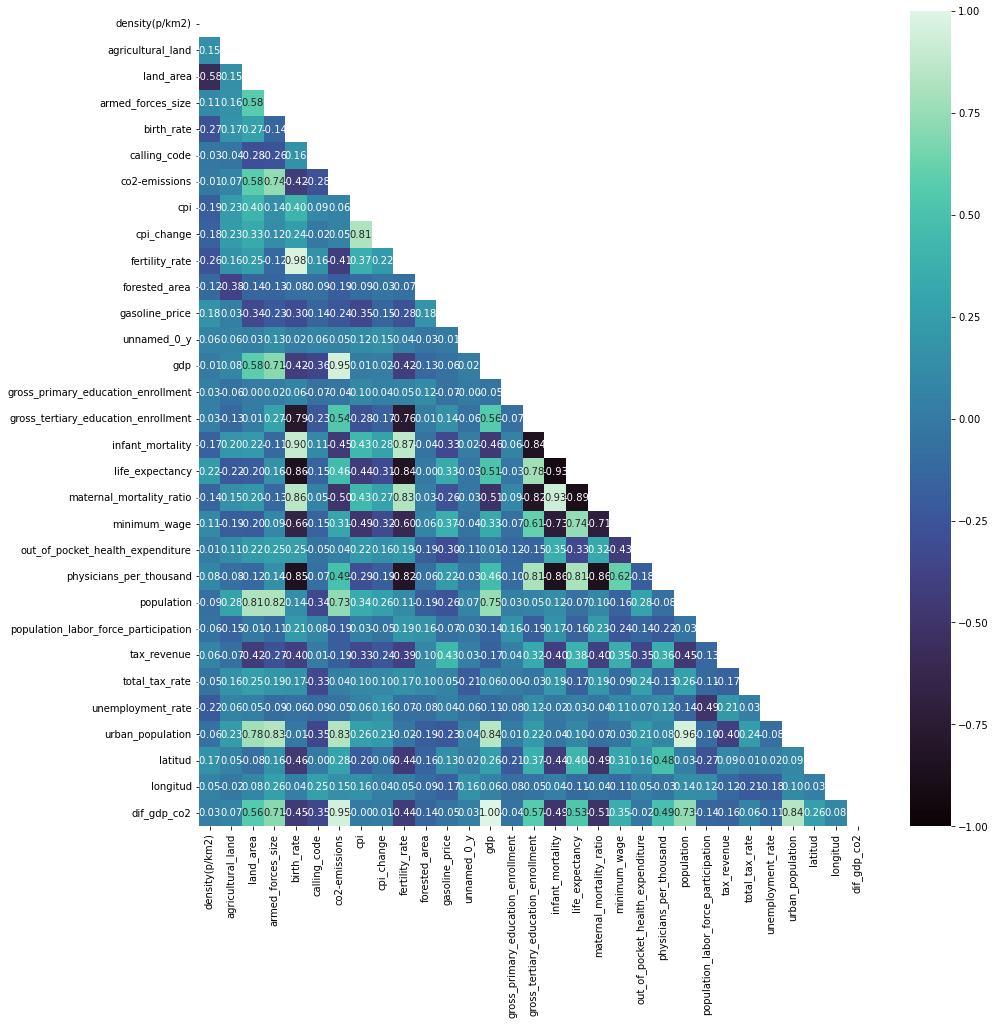

In [47]:
# AHORA YA PODREMOS ENTENDER DE UNA FORMA MÁS AMIGABLE LOS RESULTADOS DE LA MATRIZ DE CORRELACIÓN
# establecemos el tamaño de la gráfica
plt.figure(figsize = (15, 15))

# creamos una matriz booleana de máscara
mask = np.triu(np.ones_like(df_correlaciones, dtype=bool))

# creamos un heatmap con la máscara
sns.heatmap(df_correlaciones, 
            annot = True, 
            fmt = ".2f", 
            cmap = "mako", 
            vmax = 1, 
            vmin = -1, 
            mask = mask); 

Entre las correlaciones fuertes, encontramos los valores mas altos entre las variables : fertility_rate/birth_rate (0,98), infant_mortality/maternal_mortality_rate(0,93) y population/urban_population(0,96), y entre las variables con correlacion negativa life_expectancy/maternal_mortaly_ratio(-0.89), infant_mortality/life_expectancy(-0.93) y birth_rate/physician_per_thousand(-0.85)